In [3]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import dash_cytoscape as cyto
import graph_tools
import dash
import dash_html_components as html
from collections import Counter
from matplotlib import cm
import matplotlib as mpl

In [4]:
import graph_tool

ModuleNotFoundError: No module named 'graph_tool'

## Importing the datasets
### Baseball

In [2]:
# Importing the baseball datasets

baseball_dataset1 = pd.read_csv('datasets/baseball/BASEBALL_1M.csv')
baseball_dataset2 = pd.read_csv('datasets/baseball/BASEBALL_2M.csv')

# Setting custom row label

baseball_dataset1 = baseball_dataset1.set_index('Unnamed: 0', drop=True)
baseball_dataset2 = baseball_dataset2.set_index('Unnamed: 0', drop=True)

# Checking the datasets

baseball_dataset1.head()
#baseball_dataset2.head()

,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,Randy_Velarde,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Victor_Conte,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jeremy_Giambi,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Jason_Giambi,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Gary_Sheffield,1,1,2,2,1,1,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
Bobby_Estalella,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Pandas -> Numpy array

baseball1 = baseball_dataset1.to_numpy()
baseball2 = baseball_dataset2.to_numpy()

### Airport

In [4]:
# Importing the baseball datasets

flights_dataset = pd.read_csv('datasets/uk_flights/Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_2003_adjlist.csv', sep = ';')

# Dropping the last column, which is invalid

flights_dataset = flights_dataset.drop(columns=['Unnamed: 3'])

# Checking the datasets

flights_dataset.head()

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,483226
1,HEATHROW,BELFAST CITY,743758
2,HEATHROW,BELFAST INTERNATIONAL,25963
3,HEATHROW,EDINBURGH,1577063
4,HEATHROW,GLASGOW,1345532


In [5]:
# Pandas -> Numpy array

flights = flights_dataset.to_numpy()

## Visualizing the connections
### Baseball

In [6]:
# Creating a graph object from the matrix

baseball_graph = nx.convert_matrix.from_numpy_matrix(baseball1)

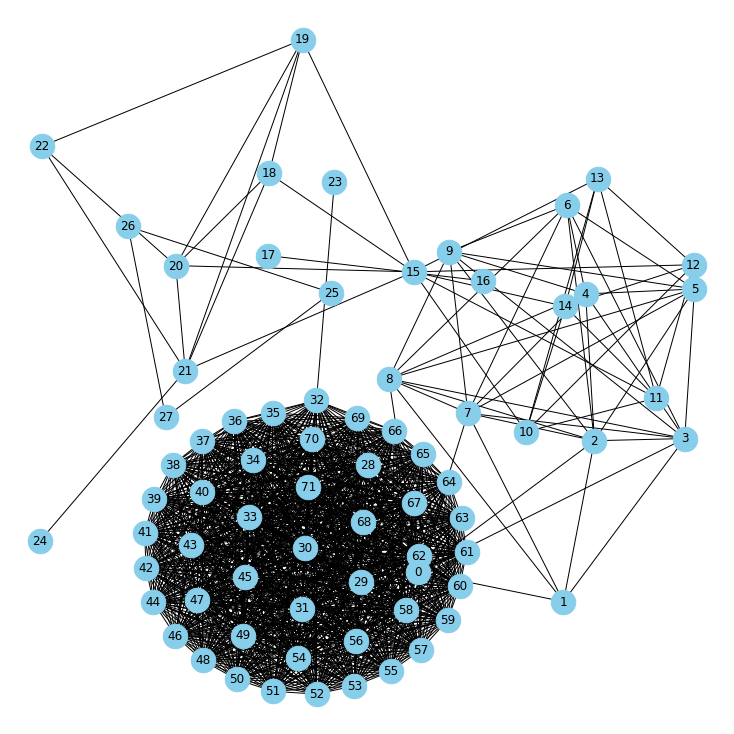

In [7]:
# Drawing the graph

plt.figure(figsize=(10,10))

#pos_cust = nx.circular_layout(baseball1_graph,scale=150)
pos_cust = nx.kamada_kawai_layout(baseball_graph)
#pos_cust = nx.spring_layout(baseball1_graph,scale=150)

nx.draw(baseball_graph, with_labels=True, 
        node_color = 'skyblue', node_size=600, 
        pos = pos_cust, 
        width = 1) 

#plt.savefig('baseball_graph.jpg', dpi = 600)

### Calculating some basic properties

In [8]:
#print(f"radius: {nx.radius(baseball_graph)}")
#print(f"diameter: {nx.diameter(baseball_graph)}")
#print(f"eccentricity: {nx.eccentricity(baseball_graph)}")
#print(f"center: {nx.center(baseball_graph)}")
#print(f"periphery: {nx.periphery(baseball_graph)}")
print(f"density: {nx.density(baseball_graph)}")

density: 0.426056338028169


### Flights

In [9]:
# Creating a list with the different airports

destinations1 = list(set(flights.T[0]))
destinations2 = list(set(flights.T[1]))

all_dest = list(set(destinations1 + destinations2))

In [10]:
# Creating the graph

flights_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(all_dest)):
    flights_graph.add_node(all_dest[i])
    
# Adding the weights

for i in range(0,len(flights)):
    flights_graph.add_edge(flights[i][0], flights[i][1])

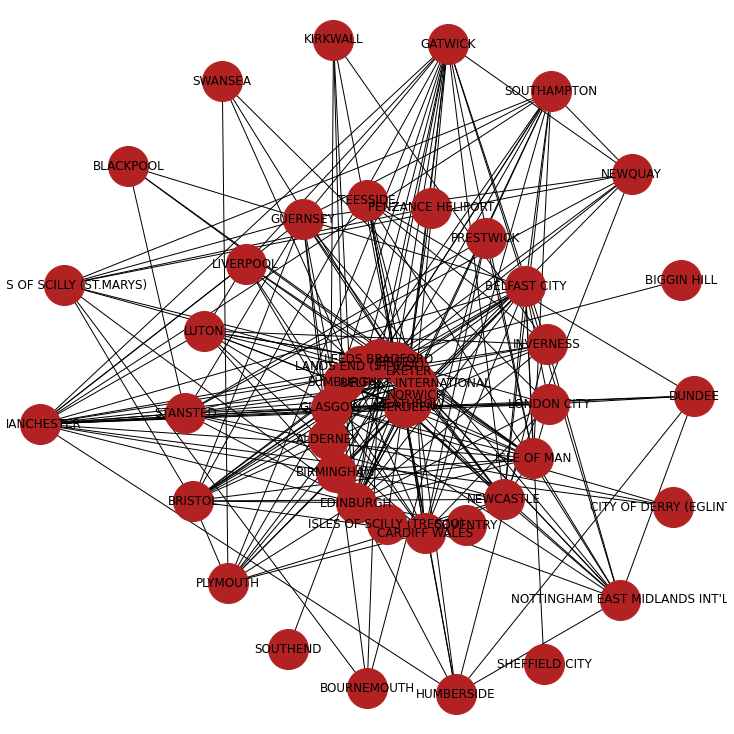

In [11]:
# Plotting the graph

plt.figure(figsize = (10,10))

# Setting the layout

pos_cust = nx.spiral_layout(flights_graph,scale=150)

nx.draw(flights_graph, with_labels=True, font_size=12,
        pos = pos_cust,
        node_color = 'firebrick', node_size=1600,  
        width = 1)

#plt.savefig('flights_graph.jpg', dpi=600)

In [12]:
#print(f"radius: {nx.radius(flights_graph)}")
#print(f"diameter: {nx.diameter(flights_graph)}")
#print(f"density: {nx.density(flights_graph)}")
#print(f"eccentricity: {nx.eccentricity(flights_graph)}")
#print(f"center: {nx.center(flights_graph)}")
#print(f"periphery: {nx.periphery(flights_graph)}")

## US Flights

In [13]:
# Importing the facebook posts datasets

us_flights_dataset = pd.read_csv('datasets/us_flights/us_flights.txt', sep = ' ', names=["Departure", "Destination", "Time"])

# Checking the dataset

us_flights_dataset.head()

,Departure,Destination,Time
0,1,111,68150
1,1,49,110902
2,1,283,72020
3,1,177,220192
4,1,72,164951


In [14]:
# Transforming the data into a numpy array

us_flights = us_flights_dataset.to_numpy()

us_flights_departure = us_flights.T[0]
us_flights_destination = us_flights.T[1]

# Creating a vector containing every city in the lists

us_all_dest = list(set(list(us_flights_departure) + list(us_flights_destination)))

In [15]:
# Creating the graph for the US flights

us_flights_graph = nx.Graph()
    
# Adding the edges

for i in range(0,len(us_flights_departure)):
    us_flights_graph.add_edge(us_flights_departure[i], us_flights_destination[i]) 

In [16]:
# Calculating the degree centrality 

us_flights_degree_cent = nx.degree_centrality(us_flights_graph)

# Calculating the degree distribution (not normalised)

us_flights_degree_distr = np.round(np.array(list(us_flights_degree_cent.values()))*(len(us_all_dest)-1))

# Counting the different values

us_flights_degree_distr_dict = Counter(us_flights_degree_distr)

In [17]:
# Going through the us_flights_degree_distr values
# Distinguishing the values above and below 5

# Creating a dictionary

my_dict = {}

# Creating a variable for the values below 5

temp_value = 0

# Creating a counter for the amount of cities being below degree_cent < 5

city_counter = 0

for i in range(0,len(list(us_flights_degree_distr_dict.values()))):

    #if the value is above 5, we add it to the dictionary
    if list(us_flights_degree_distr_dict.values())[i] > 5:
    
        my_dict[str(int(list(us_flights_degree_distr_dict.keys())[i]))] = list(us_flights_degree_distr_dict.values())[i]
    
    #if the values is under 5, we collect the values 
    else:
        temp_value += list(us_flights_degree_distr_dict.values())[i]
        city_counter += 1
        
# Appending the other values to the dictionary

my_dict['Other airports (' + str(city_counter) + ')'] = temp_value

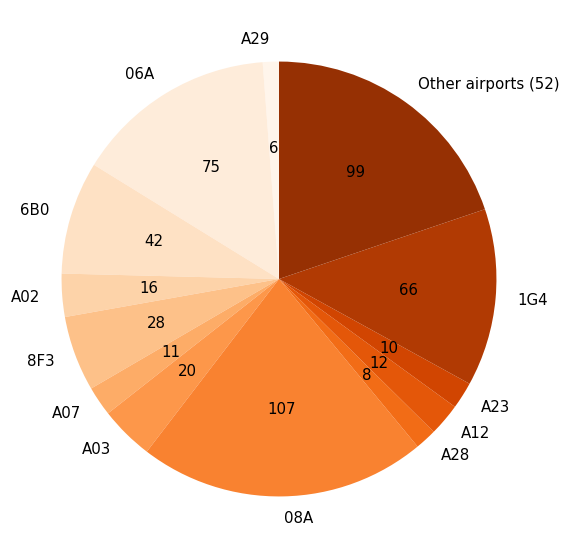

In [18]:
#Setting the font size to larger

mpl.rcParams['font.size'] = 15.0

# Setting the values for the pie chart

y = my_dict.values()
mylabels = ["A29", "06A", "6B0", "A02", "8F3", "A07", "A03", "08A", "A28", "A12", "A23", "1G4", 'Other airports (52)']

# Creating pie chart from the values

fig1, ax1 = plt.subplots(figsize=(10, 10))

theme = plt.get_cmap('Oranges')
ax1.set_prop_cycle("color", [theme(1. * i / len(list(my_dict.keys())))for i in range(len(list(my_dict.keys())))])

def absolute_value(val):
    a  = np.round(val/100.*sum(list(my_dict.values())), 0)
    return int(a)

ax1.pie(y, labels = mylabels, startangle = 90, autopct=absolute_value)

plt.savefig('us_flights_pie_chart.jpg', dpi=600)

plt.show()

## Facebook posts

In [19]:
# Importing the facebook posts datasets

facebook_posts_dataset = pd.read_csv('out.facebook-wosn-wall', sep = ' ')

# Dropping the Time_Stamp values

facebook_posts_dataset = facebook_posts_dataset.set_index('Time_Stamp', drop=True)

# Checking the dataset

facebook_posts_dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'out.facebook-wosn-wall'

In [ ]:
# Transforming the dataset into numpy array

facebook_posts = facebook_posts_dataset.to_numpy()

# Transforming the data into nodes1, nodes2 and weights

facebook_nodes1 = facebook_posts.T[0]
facebook_nodes2 = facebook_posts.T[1]
facebook_weights = facebook_posts.T[2]